In [1]:
# -----------
# User Instructions
#
# Implement a P controller by running 100 iterations
# of robot motion. The steering angle should be set
# by the parameter tau so that:
#
# steering = -tau_p * CTE - tau_d * diff_CTE - tau_i * int_CTE
#
# where the integrated crosstrack error (int_CTE) is
# the sum of all the previous crosstrack errors.
# This term works to cancel out steering drift.
#
# Only modify code at the bottom! Look for the TODO.
# ------------

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# ------------------------------------------------
# 
# this is the Robot class
#

class Robot(object):
    def __init__(self, length=20.0):
        """
        Creates robot and initializes location/orientation to 0, 0, 0.
        """
        self.x = 0.0
        self.y = 0.0
        self.orientation = 0.0
        self.length = length
        self.steering_noise = 0.0
        self.distance_noise = 0.0
        self.steering_drift = 0.0

    def set(self, x, y, orientation):
        """
        Sets a robot coordinate.
        """
        self.x = x
        self.y = y
        self.orientation = orientation % (2.0 * np.pi)

    def set_noise(self, steering_noise, distance_noise):
        """
        Sets the noise parameters.
        """
        # makes it possible to change the noise parameters
        # this is often useful in particle filters
        self.steering_noise = steering_noise
        self.distance_noise = distance_noise

    def set_steering_drift(self, drift):
        """
        Sets the systematical steering drift parameter
        """
        self.steering_drift = drift

    def move(self, steering, distance, tolerance=0.001, max_steering_angle=np.pi / 4.0):
        """
        steering = front wheel steering angle, limited by max_steering_angle
        distance = total distance driven, most be non-negative
        """
        if steering > max_steering_angle:
            steering = max_steering_angle
        if steering < -max_steering_angle:
            steering = -max_steering_angle
        if distance < 0.0:
            distance = 0.0

        # apply noise
        steering2 = random.gauss(steering, self.steering_noise)
        distance2 = random.gauss(distance, self.distance_noise)

        # apply steering drift
        steering2 += self.steering_drift

        # Execute motion
        turn = np.tan(steering2) * distance2 / self.length

        if abs(turn) < tolerance:
            # approximate by straight line motion
            self.x += distance2 * np.cos(self.orientation)
            self.y += distance2 * np.sin(self.orientation)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
        else:
            # approximate bicycle model for motion
            radius = distance2 / turn
            cx = self.x - (np.sin(self.orientation) * radius)
            cy = self.y + (np.cos(self.orientation) * radius)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
            self.x = cx + (np.sin(self.orientation) * radius)
            self.y = cy - (np.cos(self.orientation) * radius)

    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f]' % (self.x, self.y, self.orientation)

In [2]:
############## ADD / MODIFY CODE BELOW ####################
# ------------------------------------------------------------------------
#
# run - does a single control run
def run(robot, tau_p, tau_d, tau_i, n=100, speed=1.0):
    x_trajectory = []
    y_trajectory = []
    # TODO: your code here
    prev_cte = robot.y
    int_cte = 0
    for i in range(n):
        cte = robot.y
        diff_cte = cte - prev_cte
        prev_cte = cte
        int_cte += cte
        steer = -tau_p * cte - tau_d * diff_cte - tau_i * int_cte
        robot.move(steer, speed)
        # Print some debug messages
        if i < 20:
            print(robot.__repr__())
        x_trajectory.append(robot.x)
        y_trajectory.append(robot.y)
    return x_trajectory, y_trajectory

In [3]:
robot = Robot()
robot.set(0, 1, 0)

x_trajectory, y_trajectory = run(robot, 0.2, 3.0, 0.004)
n = len(x_trajectory)

[x=0.99998 y=0.99483 orient=6.27284]
[x=1.99986 y=0.97964 orient=6.26315]
[x=2.99957 y=0.95552 orient=6.25497]
[x=3.99907 y=0.92392 orient=6.24820]
[x=4.99836 y=0.88620 orient=6.24271]
[x=5.99744 y=0.84356 orient=6.23835]
[x=6.99636 y=0.79706 orient=6.23499]
[x=7.99514 y=0.74764 orient=6.23251]
[x=8.99381 y=0.69615 orient=6.23082]
[x=9.99242 y=0.64331 orient=6.22982]
[x=10.99099 y=0.58997 orient=6.22942]
[x=11.98955 y=0.53623 orient=6.22951]
[x=12.98811 y=0.48258 orient=6.23009]
[x=13.98672 y=0.43001 orient=6.23110]
[x=14.98540 y=0.37858 orient=6.23238]
[x=15.98415 y=0.32857 orient=6.23393]
[x=16.98298 y=0.28023 orient=6.23570]
[x=17.98190 y=0.23374 orient=6.23766]
[x=18.98091 y=0.18927 orient=6.23975]
[x=19.98001 y=0.14694 orient=6.24194]


In [4]:
# P controller
def run_p(robot, tau, n=100, speed=1.0):
    x_trajectory = []
    y_trajectory = []
    for i in range(n):
        cte = robot.y
        steer = -tau * cte
        robot.move(steer, speed)
        # Print some debug messages
        #if i < 20:
        #    print(robot.__repr__())
        x_trajectory.append(robot.x)
        y_trajectory.append(robot.y)
    return x_trajectory, y_trajectory

# PD Controller
def run(robot, tau_p, tau_d, n=100, speed=1.0):
    x_trajectory = []
    y_trajectory = []
    # TODO: your code here
    x_trajectory = []
    y_trajectory = []
    prev_cte = robot.y
    for i in range(n):
        cte = robot.y
        diff_cte = cte - prev_cte
        prev_cte = cte
        steer = -tau_p * cte - tau_d * diff_cte
        robot.move(steer, speed)
        # Print some debug messages
        #if i < 20:
        #    print(robot.__repr__())
        x_trajectory.append(robot.x)
        y_trajectory.append(robot.y)
    return x_trajectory, y_trajectory

In [5]:
# P Controller
print("------------ P Controller --------------")
robot_p = Robot()
robot_p.set(0, 1, 0)
x_trajectory_p, y_trajectory_p = run_p(robot_p, 0.2)
n_p = len(x_trajectory_p)

# PD Controller
print("------------ PD Controller -------------")
robot_pd = Robot()
robot_pd.set(0, 1, 0)
x_trajectory_pd, y_trajectory_pd = run(robot_pd, 0.2, 3.0)
n_pd = len(x_trajectory_pd)

------------ P Controller --------------
------------ PD Controller -------------


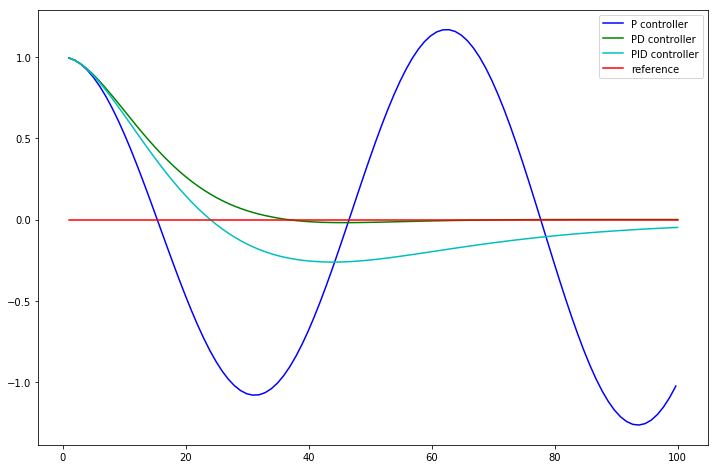

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(x_trajectory_p, y_trajectory_p, 'b', label='P controller')
ax.plot(x_trajectory_pd, y_trajectory_pd, 'g', label='PD controller')
ax.plot(x_trajectory, y_trajectory, 'c', label='PID controller')
ax.plot(x_trajectory, np.zeros(n), 'r', label='reference')
ax.legend(loc='upper right')